In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [160]:
mouse_data = "data/Mouse_metadata.csv"
study_data = "data/Study_results.csv"
mouse = pd.read_csv(mouse_data)
study = pd.read_csv(study_data)


In [161]:
combined = pd.merge(mouse, study, how="inner", on="Mouse ID")
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
mean = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
s_d = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": s_d, "SEM": sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
drug = pd.DataFrame(combined.groupby(["Drug Regimen"]).count()).reset_index()
drugs = drug[["Drug Regimen", "Mouse ID"]]
drugs = drugs.set_index("Drug Regimen")


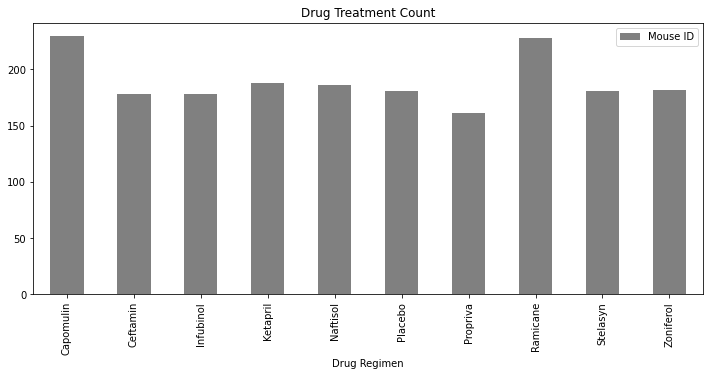

In [164]:
drugs.plot(kind="bar", color=['grey'], figsize=(12,5))
plt.title("Drug Treatment Count")
plt.show()

In [165]:
sex = pd.DataFrame(combined.groupby(["Sex"]).count()).reset_index()
sex = sex[["Sex", "Mouse ID"]]
sex.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


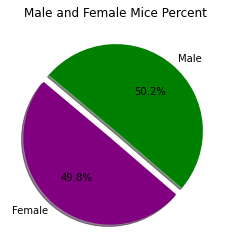

In [166]:
colors =["Purple", "Green"]
number =[124,125]
lables =["Female", "Male"]
explode =(0.1, 0)
plt.pie(number, explode=explode, labels=lables, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male and Female Mice Percent")
plt.show()

In [167]:
final_vol = combined[combined["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_vol = final_vol.sort_values(["Timepoint"], ascending=True)
final_volume
best = final_vol[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


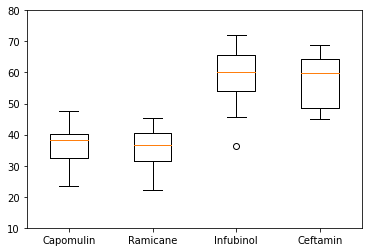

In [168]:
best = best.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best.head()

best = best.to_frame()
best

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = best.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list = pd.DataFrame(tumor_lists)
tumor_list = tumor_list.reindex(top_4)
tumor_vols = [vol for vol in tumor_list['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

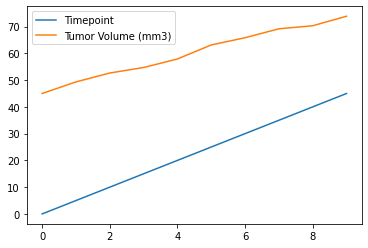

In [169]:
Vinnie_aka_Z969 = combined[combined["Mouse ID"].isin(["z969"])]
Vinnie_aka_Z969
Vinnie_aka_Z969 = Vinnie_aka_Z969[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Vinnie_aka_Z969
line_Vinnie = Vinnie_aka_Z969.reset_index()
line_Vinnie = line_Vinnie[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_Vinnie
lines = line_Vinnie.plot.line()

<AxesSubplot:title={'center':'Tumor Volume vs. Weight'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

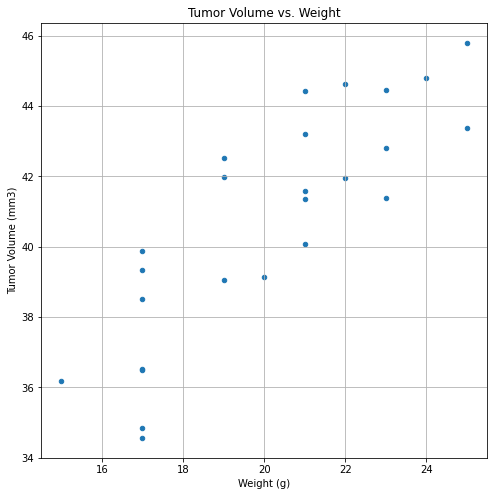

In [174]:
scatter = combined[combined["Drug Regimen"].isin(["Capomulin"])]
sort = scatter.sort_values(["Weight (g)"], ascending=True)
scatter = scatter.reset_index()
groupweight = scatter.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
group_plot = pd.DataFrame(groupweight).reset_index()
capo_scatter = group_plot.plot(kind="scatter", x="Weight (g)", y='Tumor Volume (mm3)', grid=True, figsize=(8,8), title="Tumor Volume vs. Weight")
capo_scatter

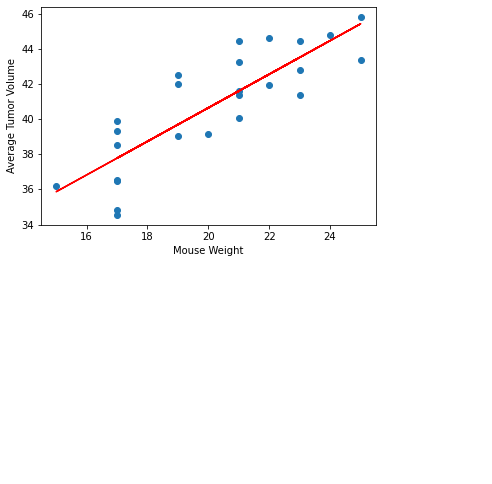

In [192]:
from scipy.stats import linregress

x_values = groupweight["Weight (g)"]
y_values = groupweight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=30,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()